In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/prisc/Desktop/ejercicios python/Northumbria/datasets/immunotherapy.csv')
df.head(20)

,Unnamed: 0,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,1,22.0,2.25,14.0,3.0,51,50,1
1,2,1,15.0,3.00,NaN,3.0,900,70,1
2,3,1,16.0,10.50,2.0,1.0,100,25,1
3,4,1,27.0,4.50,9.0,3.0,80,30,1
4,5,1,20.0,8.00,6.0,1.0,45,8,1
5,6,1,15.0,5.00,3.0,3.0,84,7,1
6,7,1,35.0,9.75,2.0,2.0,8,6,1
7,8,2,28.0,7.50,4.0,1.0,9,2,1
8,9,2,19.0,6.00,2.0,1.0,225,8,1
9,10,2,NaN,12.00,6.0,3.0,35,5,0


In [2]:
#features within the dataset with missing data
df.isna().sum()

Unnamed: 0             0
sex                    0
age                    4
Time                   0
Number_of_Warts        7
Type                   3
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [3]:
# percentage of the total dataset missing
missing=sum(df['age'].isna()==True)+sum(df['Type'].isna()==True)+sum(df['Number_of_Warts'].isna()==True)
missingness=missing/df.shape[0]*100 
print('There are',missing, 'missing data which is the','%.2f'%+missingness, '% of the dataset')

There are 14 missing data which is the 15.56 % of the dataset


In [4]:
#percentage of missing data per feature
df.isna().sum()/df.shape[0]*100

Unnamed: 0             0.000000
sex                    0.000000
age                    4.444444
Time                   0.000000
Number_of_Warts        7.777778
Type                   3.333333
Area                   0.000000
induration_diameter    0.000000
Result_of_Treatment    0.000000
dtype: float64

## Replacing missing values

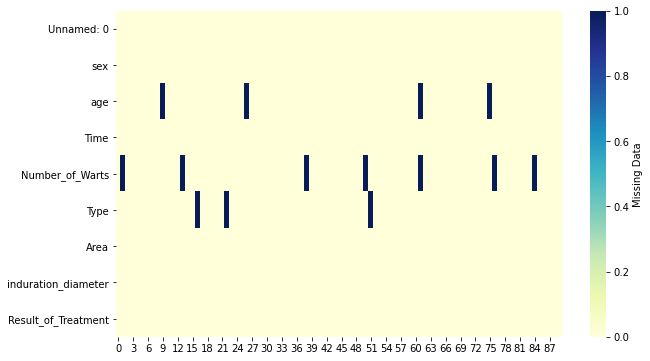

In [5]:
#Little’s test
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
    cmap="YlGnBu",
    cbar_kws={'label': 'Missing Data'})
plt.show()

the heatmap shows that the values have a p.value>0.05 therefore the data can be treated as MCAR

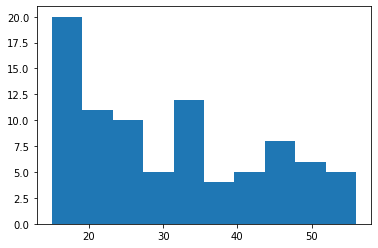

In [6]:
plt.hist(df['age'])
plt.show()

In [7]:
#Since it is a skewed distributions, the median is better than the mean because it is not influenced
# by extremely large values
import numpy as np
median = df['age'].median()
df['age'].replace(np.NAN,median,inplace=True)
df.head(20)

,Unnamed: 0,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,1,22.0,2.25,14.0,3.0,51,50,1
1,2,1,15.0,3.00,NaN,3.0,900,70,1
2,3,1,16.0,10.50,2.0,1.0,100,25,1
3,4,1,27.0,4.50,9.0,3.0,80,30,1
4,5,1,20.0,8.00,6.0,1.0,45,8,1
5,6,1,15.0,5.00,3.0,3.0,84,7,1
6,7,1,35.0,9.75,2.0,2.0,8,6,1
7,8,2,28.0,7.50,4.0,1.0,9,2,1
8,9,2,19.0,6.00,2.0,1.0,225,8,1
9,10,2,28.5,12.00,6.0,3.0,35,5,0


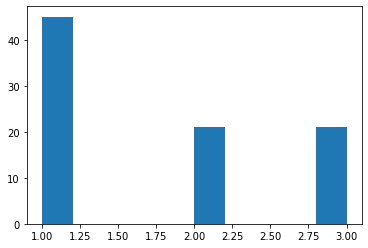

In [8]:
plt.hist(df['Type'])
plt.show()

In [9]:
#For this distribution, since there are repetitive values, it will be 
#taken the mode as the most representative value
import numpy as np
import statistics
mode = statistics.mode(df['Type'])
df['Type'].replace(np.NAN,mode,inplace=True)
df.head(20)

,Unnamed: 0,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,1,22.0,2.25,14.0,3.0,51,50,1
1,2,1,15.0,3.00,NaN,3.0,900,70,1
2,3,1,16.0,10.50,2.0,1.0,100,25,1
3,4,1,27.0,4.50,9.0,3.0,80,30,1
4,5,1,20.0,8.00,6.0,1.0,45,8,1
5,6,1,15.0,5.00,3.0,3.0,84,7,1
6,7,1,35.0,9.75,2.0,2.0,8,6,1
7,8,2,28.0,7.50,4.0,1.0,9,2,1
8,9,2,19.0,6.00,2.0,1.0,225,8,1
9,10,2,28.5,12.00,6.0,3.0,35,5,0


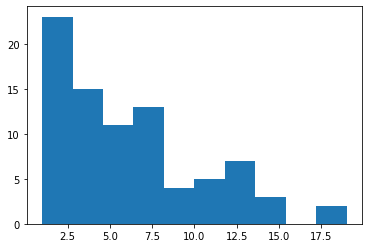

In [10]:
plt.hist(df['Number_of_Warts'])
plt.show()

In [11]:
#Since it is a skewed distributions, the median is better than the mean because 
#it is less influenced by outliers
import numpy as np
median_Warts = df['Number_of_Warts'].median()
df['Number_of_Warts'].replace(np.NAN,median_Warts,inplace=True)
df.head(20)

,Unnamed: 0,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,1,22.0,2.25,14.0,3.0,51,50,1
1,2,1,15.0,3.00,6.0,3.0,900,70,1
2,3,1,16.0,10.50,2.0,1.0,100,25,1
3,4,1,27.0,4.50,9.0,3.0,80,30,1
4,5,1,20.0,8.00,6.0,1.0,45,8,1
5,6,1,15.0,5.00,3.0,3.0,84,7,1
6,7,1,35.0,9.75,2.0,2.0,8,6,1
7,8,2,28.0,7.50,4.0,1.0,9,2,1
8,9,2,19.0,6.00,2.0,1.0,225,8,1
9,10,2,28.5,12.00,6.0,3.0,35,5,0


In [12]:
df['induration_diameter_class']=np.where(df.induration_diameter<20,"Small",
                                         np.where(df.induration_diameter<50,"Medium","Large"))
df.head(10)

,Unnamed: 0,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,induration_diameter_class
0,1,1,22.0,2.25,14.0,3.0,51,50,1,Large
1,2,1,15.0,3.00,6.0,3.0,900,70,1,Large
2,3,1,16.0,10.50,2.0,1.0,100,25,1,Medium
3,4,1,27.0,4.50,9.0,3.0,80,30,1,Medium
4,5,1,20.0,8.00,6.0,1.0,45,8,1,Small
5,6,1,15.0,5.00,3.0,3.0,84,7,1,Small
6,7,1,35.0,9.75,2.0,2.0,8,6,1,Small
7,8,2,28.0,7.50,4.0,1.0,9,2,1,Small
8,9,2,19.0,6.00,2.0,1.0,225,8,1,Small
9,10,2,28.5,12.00,6.0,3.0,35,5,0,Small


In [13]:
# to reorder columns in dataframe
#df = df[['a', 'y', 'b', 'x']]
# or use list comprehension to select every column not in your target set and then append the target set to the end
#df[[c for c in df if c not in ['b', 'x']] + ['b', 'x']]
#this prints a  y  b   x

In [24]:
df['induration_diameter_class'].value_counts(ascending=True)

Large      9
Medium    12
Small     69
Name: induration_diameter_class, dtype: int64

In [25]:
# Count Occurrences in Column – i.e. Unique Values
# https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/